C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:11: RuntimeWarning: invalid value encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)
C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  step_size = 1 / length_of_line


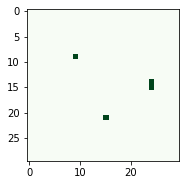

In [30]:
%reload_ext autoreload

%autoreload

import numpy as np
import visualization.array_rendering as ar
import visualization.creature_rendering as cr
import creature_spawning.spawn_creature as sc



world_size = 30
empty_template = np.zeros(shape=(world_size,world_size))


def spawn_new_plants(num_plants: int = 1):

    new_plants = []

    for i in range(num_plants):
        plant = sc.generate_random_simple_creature(1)
        plant[0,1] = np.random.randint(2,world_size-2)
        plant[0,2] = np.random.randint(2,world_size-2)
        plant[0,3] = np.random.random_sample() * np.pi * 2
        new_plants.append(plant)

    return new_plants

def draw_creatures(creature_list):
    for creature in creature_list:
        translated_creature = cr.translate_creature_segs_to_world(creature)
        cr.place_creature(empty_template, translated_creature)
    ar.render_array(empty_template)

plants = spawn_new_plants(3)
draw_creatures(plants)